## Example of running ellc in a Jupyter notebook


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import ellc

### Print ellc.lc() in-line documentation

In [6]:
help(ellc.lc)

Help on function lc in module ellc.lc:

lc(t_obs, radius_1, radius_2, sbratio, incl, light_3=0, t_zero=0, period=1, a=None, q=1, f_c=None, f_s=None, ldc_1=None, ldc_2=None, gdc_1=None, gdc_2=None, didt=None, domdt=None, rotfac_1=1, rotfac_2=1, bfac_1=None, bfac_2=None, heat_1=None, heat_2=None, lambda_1=None, lambda_2=None, vsini_1=None, vsini_2=None, t_exp=None, n_int=None, grid_1='default', grid_2='default', ld_1=None, ld_2=None, shape_1='sphere', shape_2='sphere', spots_1=None, spots_2=None, exact_grav=False, verbose=1)
    Calculate the light curve of a binary star
    
    This function calculates the light curve of a binary star using the ellc
    binary star model [1].
    
    Parameters
    ----------
    t_obs : array_like
        Times or phases of observation. The units and time system used must be
        consistent with t_zero and period.
    
    radius_1 : float
        Radius of star 1 in units of the semi-major axis of the binary.
        The radius is defined to be t

### Calculate example light curve
This is the same light curve as shown in Fig. 4 of the paper Maxted <I>ellc - a fast, flexible light curve model for detached eclipsing
binary stars and transiting exoplanets</I> &mdash; see also examples/KSint/KSint.py in the ellc package distribution.

In [12]:
time = linspace(0,25,50000)

rho = 0.4   # Stellar density in solar units
period = 1  # Orbital period in days
p_rot  = 23.9 # Rotation period of the star in days
k = 0.1     # R_planet/R_star 
a=(3.75226985055)*((period)**(2./3.))*((rho)**(1./3.))   # semi-major axis in solar radii
print("a = {:.3f} Rsun".format(a))

r_1 = 1/a     # R_star/a
r_2 = k*r_1   # R_planet/a

# Limb darkening parameters for the star
ld_1 = 'quad'
ldc_1 = [0.4,0.3]

t_zero=0.25   # Time of mid-transit

rotfac_1 = period/p_rot

# Spots on star
spots_1 = [[180-360*t_zero*rotfac_1,120-360*t_zero*rotfac_1],
           [0,0],
           [5.739170477266787, 8.11641272572196],
           [0.5,0.5]]

flux = ellc.lc(time,t_zero=t_zero, period=period, \
    radius_1=r_1, radius_2=r_2,incl=90,sbratio=0, rotfac_1 = rotfac_1, \
    ld_1=ld_1, ldc_1=ldc_1,shape_1='sphere',shape_2='sphere',\
    grid_1='sparse',grid_2='sparse',spots_1=spots_1)


a = 2.765 Rsun


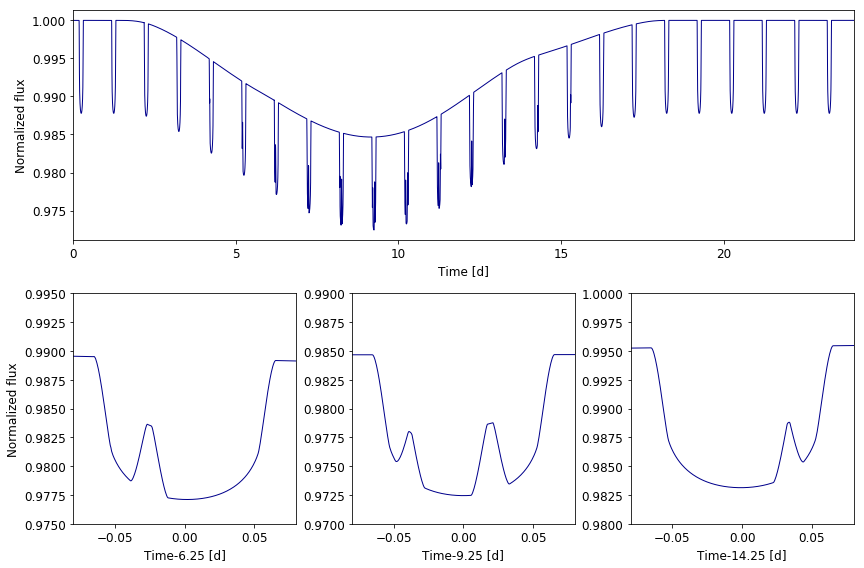

In [14]:
fontsize=12
fig=plt.figure(1,figsize=(12,8))
plt.subplot(211)
plt.xlim([0,24])
plt.plot(time,flux,linewidth=1,color='darkblue')
plt.xlabel("Time [d]",fontsize=fontsize)
plt.ylabel("Normalized flux",fontsize=fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.subplot(234)
plt.plot(time-6.25,flux,linewidth=1,color='darkblue')
plt.locator_params(axis = 'x', nbins = 4)
plt.xlabel("Time-6.25 [d]",fontsize=fontsize)
plt.ylabel("Normalized flux",fontsize=fontsize)
plt.xlim([-0.08,0.08])
plt.ylim([0.975,0.995])
plt.tick_params(axis='both', labelsize=fontsize)
plt.subplot(235)
plt.plot(time-9.25,flux,linewidth=1,color='darkblue')
plt.locator_params(axis = 'x', nbins = 4)
plt.xlabel("Time-9.25 [d]",fontsize=fontsize)
plt.xlim([-0.08,0.08])
plt.ylim([0.97,0.99])
plt.tick_params(axis='both', labelsize=fontsize)
plt.subplot(236)
plt.plot(time-14.25,flux,linewidth=1,color='darkblue')
plt.locator_params(axis = 'x', nbins = 4)
plt.xlabel("Time-14.25 [d]",fontsize=fontsize)
plt.xlim([-0.08,0.08])
plt.ylim([0.98, 1.0])
plt.tick_params(axis='both', labelsize=fontsize)
plt.tight_layout()